<a href="https://colab.research.google.com/github/alamjane/Linear-Regression/blob/main/Logistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
 
from google.colab import files
uploaded = files.upload()

Saving User_Data.csv to User_Data (2).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['User_Data.csv']))

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.shape

(400, 5)

In [ ]:
# Drop useless variables
df = df.drop(['User ID'], axis = 1)

# Reassign target
df.Gender.replace(to_replace = dict(Male = 1, Female = 0), inplace = True)

df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:
df['Purchased'].value_counts(normalize=True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

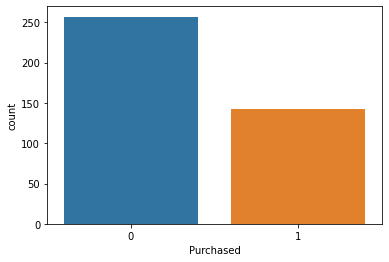

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


sns.countplot(x='Purchased', data=df)

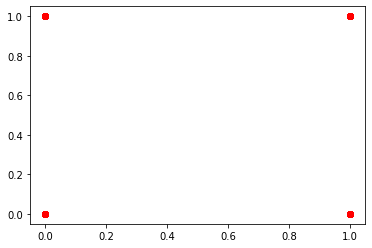

In [ ]:
plt.scatter(df.Gender, df.Purchased, marker = 'o', color = 'red')

In [ ]:
# Define input values, or X by dropping the target values:
X = df.drop(['Purchased'], axis = 1)

# Define output values - this is the target:
y = df['Purchased']

In [ ]:
# For splitting data we will be using train_test_split from sklearn:
from sklearn.model_selection import train_test_split

# Splitting the data into test and train, we are testing on 0.2 = 20% of dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict = model.predict(X_test)

y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
model.score(X_test, y_test)

0.6625